# Data Visualizaion

Data visualization is the practice of translating information into a visual context, such as a map or graph, to make data easier for the human brain to understand and pull insights from

## Seaborn

Seaborn is a statistical plotting library that is specifically designed to interact well with PANDAS 
data frames in order to create common statistical plot types like histograms and scatter plots. It's important to note that Seaborn, while being built directly off of maptplot lib, it actually uses a simpler one line syntax. 

# Scatter Plots

Scatter plots can show how different features are related to one another, the main theme between all relational plot types is they display how features are interconnected to each other.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('dm_office_sales.csv')

In [3]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [4]:
df.tail()

,division,level of education,training level,work experience,salary,sales
995,computer hardware,associate's degree,1,1,70083,177953
996,computer software,associate's degree,1,0,68648,103703
997,peripherals,associate's degree,2,8,108354,450011
998,peripherals,associate's degree,2,3,79035,330354
999,computer hardware,some college,0,9,108444,364436


In [5]:
df.shape

(1000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
training level,1000.0,1.262,0.925317,0.0,1.0,1.0,2.00,3.0
work experience,1000.0,6.142,2.947970,0.0,4.0,6.0,8.00,16.0
salary,1000.0,90264.207,17398.617174,41660.0,77584.0,89946.0,101834.25,159148.0
sales,1000.0,339833.846,108555.773316,53067.0,259257.5,338145.5,415210.25,761477.0


In [8]:
df.dtypes

division              object
level of education    object
training level         int64
work experience        int64
salary                 int64
sales                  int64
dtype: object

<AxesSubplot:xlabel='salary', ylabel='sales'>

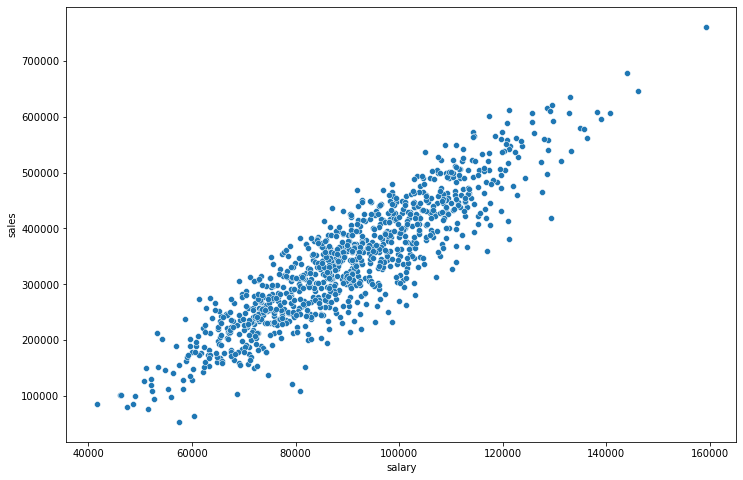

In [9]:
#Scatter plot
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary',y='sales',data=df)

<AxesSubplot:xlabel='salary', ylabel='sales'>

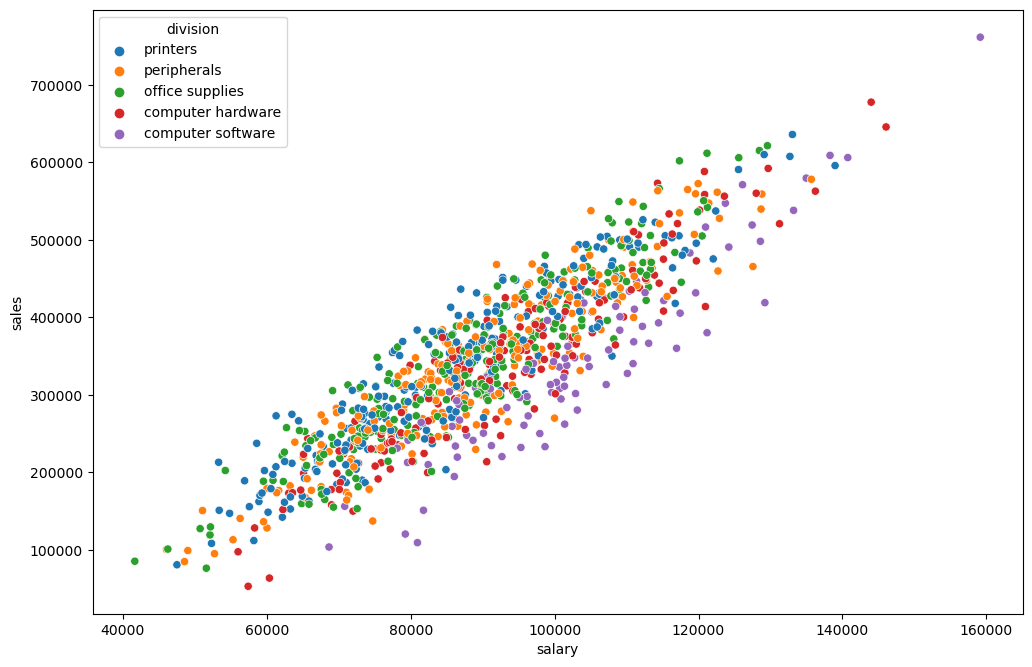

In [10]:
# HUE 
# Color points based off a categorical feature in the DataFrame


plt.figure(figsize=(12,8),dpi=100)

sns.scatterplot(x='salary',y='sales',data=df,hue='division')


<AxesSubplot:xlabel='salary', ylabel='sales'>

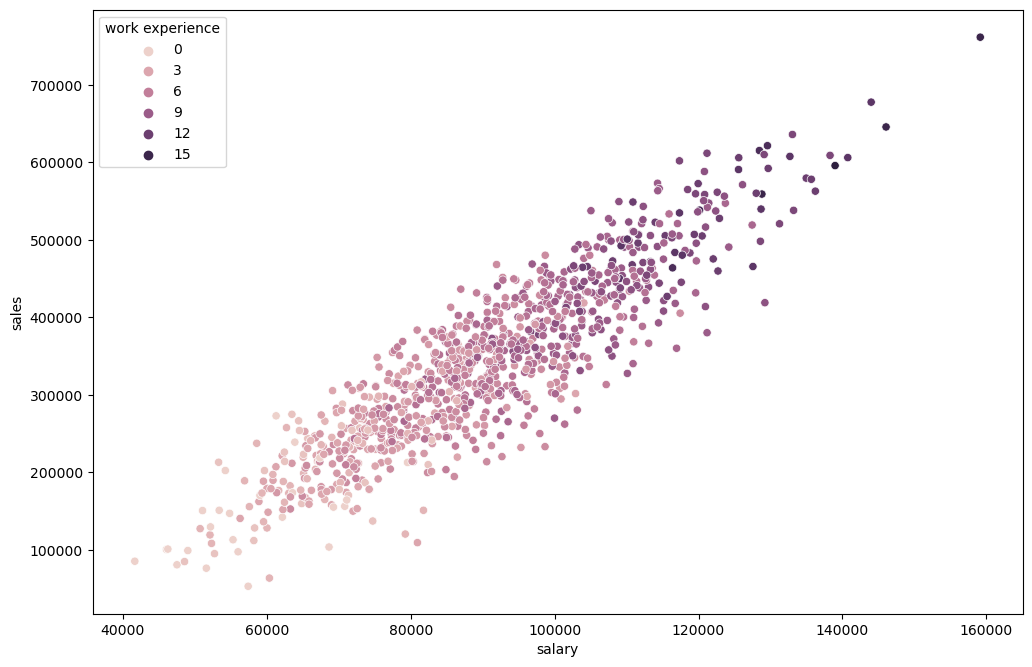

In [11]:
# HUE
# Color Gradient based off a continuous feature in the DataFrame

plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x='salary',y='sales',data=df,hue='work experience')


<AxesSubplot:xlabel='salary', ylabel='sales'>

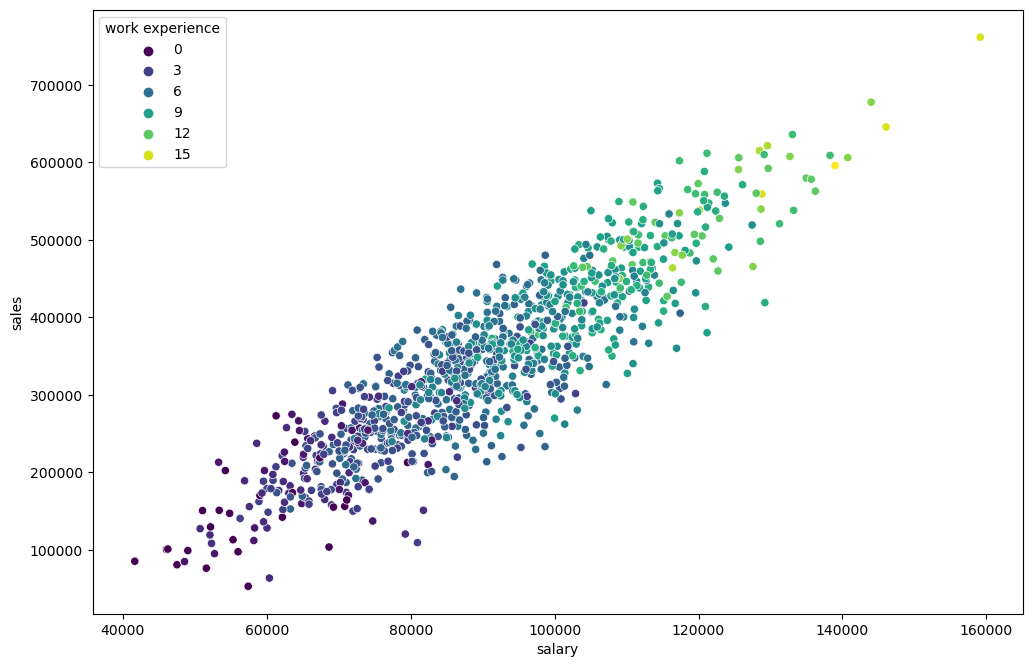

In [12]:
# We can also use palette parameter to select colors of our choice

plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x='salary',y='sales',data=df,hue='work experience', palette='viridis')


<AxesSubplot:xlabel='salary', ylabel='sales'>

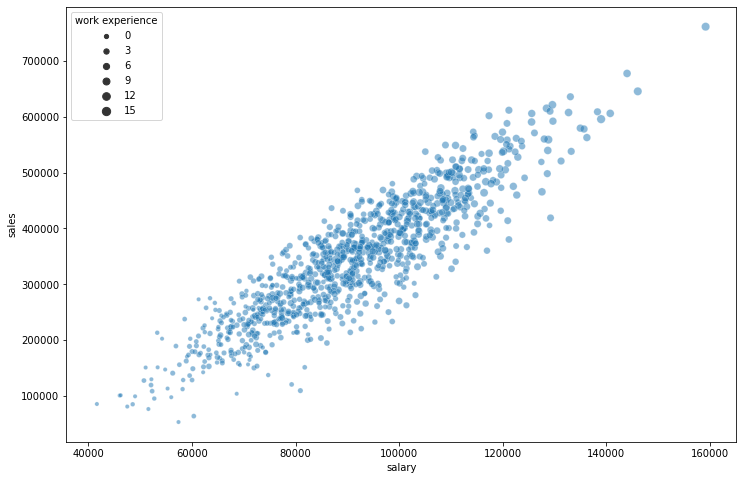

In [13]:
# other than colors we can also use size to differeniate between different features
# alpha parameter is used to control the transperency 

plt.figure(figsize=(12,8))
sns.scatterplot(x='salary',y='sales',data=df,size='work experience', alpha=0.5)

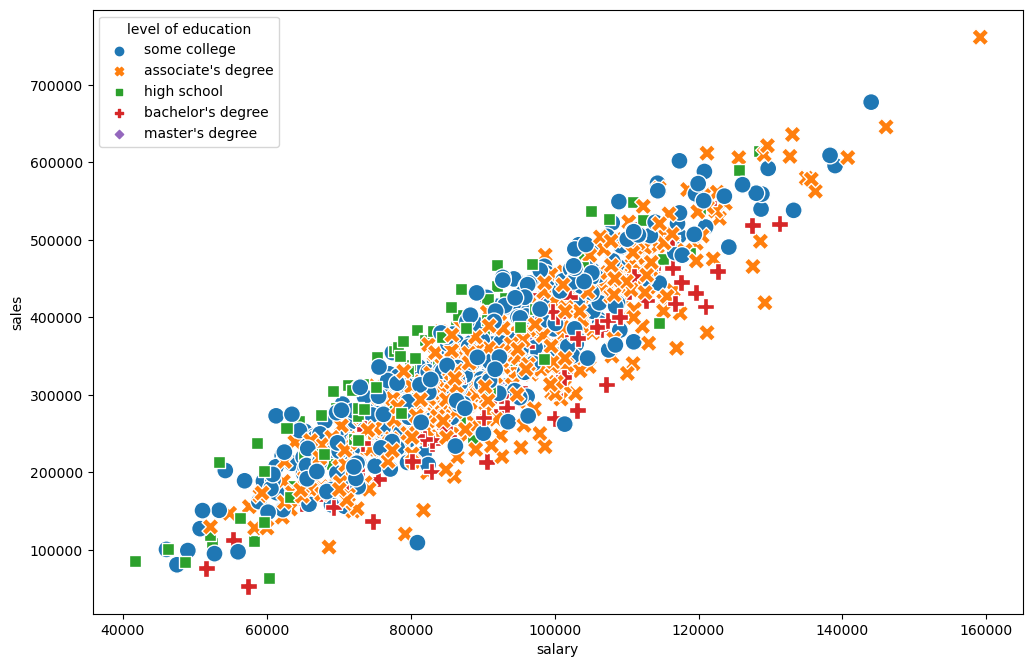

In [14]:
# we can use styles to have different kind of markers for our different catogries
# simple s is for the size of all the markers in the plot

plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x='salary',y='sales',data=df,style='level of education',hue='level of education', s=150)
plt.savefig('Scatterplot.png')

# Distribution Plots

 The distribution plot is used for displaying the distribution and range of data values over a scale. There are different distribuion plots available, I will be practising with 3 main plots
 distplot
 

1)Rug plot


 2)hist plot


 3)Kde plot

### Rugplot

A simple plot that puts down one mark per data point. This won't be used  too much since its not very clarifying for large data sets.

<AxesSubplot:xlabel='salary'>

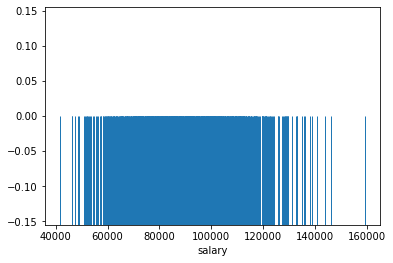

In [15]:
sns.rugplot(x='salary',data=df,height=0.5)

#### distplot
The displot is a plot type that can show you the distribution of a single feature. It is a histogram with the option of adding a "KDE" plot (Kernel Density Estimation) on top of the histogram.

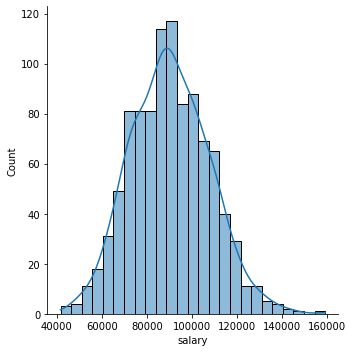

In [16]:
sns.displot(x='salary',data= df, kde=True)

<AxesSubplot:xlabel='salary', ylabel='Count'>

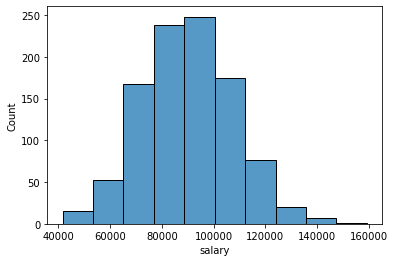

In [17]:
sns.histplot(x='salary',data= df,bins=10)

<AxesSubplot:xlabel='salary', ylabel='Count'>

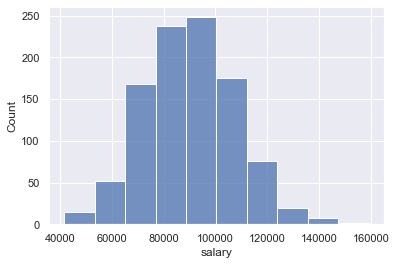

In [18]:
#we can use different plot style: one of {darkgrid, whitegrid, dark, white, ticks} for more clarity.

sns.set(style='darkgrid')
sns.histplot(x='salary',data= df,bins=10)


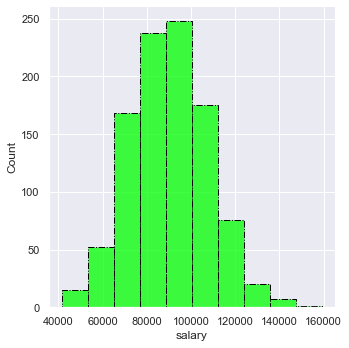

In [19]:
# we can add more styles using the same commands as we did in matplotlib

sns.displot(data=df,x='salary',bins=10, color='lime',edgecolor='black' , ls='-.')

### Kdeplot
The KDE plot maps an estimate of a probability density function 

<AxesSubplot:xlabel='salary', ylabel='Density'>

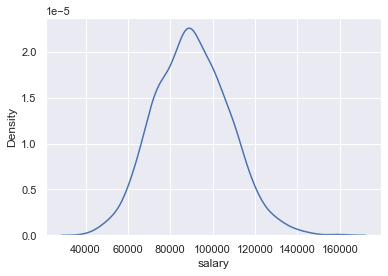

In [20]:
sns.kdeplot(data=df,x='salary')

<AxesSubplot:xlabel='salary', ylabel='Density'>

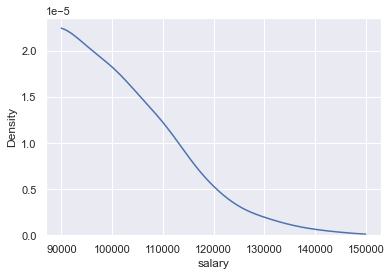

In [21]:
#We could cut off the KDE if we know our data has hard limits

sns.kdeplot(data=df,x='salary',clip=[90000,150000])

<AxesSubplot:xlabel='salary', ylabel='Density'>

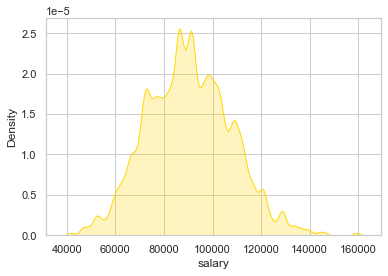

In [22]:
sns.set(style='whitegrid')
sns.kdeplot(data=df,x='salary',bw_adjust=0.3, shade=True,color='gold')

# Categorical Plots 
## Statistical estimation

Often we have categorical data, meaning the data is in distinct groupings, such as Countries or Companies. Data is not in a continuous form like age , height , weight etc. We will use **Countplot and barplot** to plot our categorical data  

In [23]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


## Countplot()

A simple plot, it  shows the total count of rows per category. 

Using pandas we can show our total values per column by using these commands

In [24]:
df['level of education'].value_counts()

associate's degree    412
some college          392
high school           108
bachelor's degree      85
master's degree         3
Name: level of education, dtype: int64

In [25]:
df['level of education'].count()

1000

Now we will visualize using countplot

<AxesSubplot:xlabel='level of education', ylabel='count'>

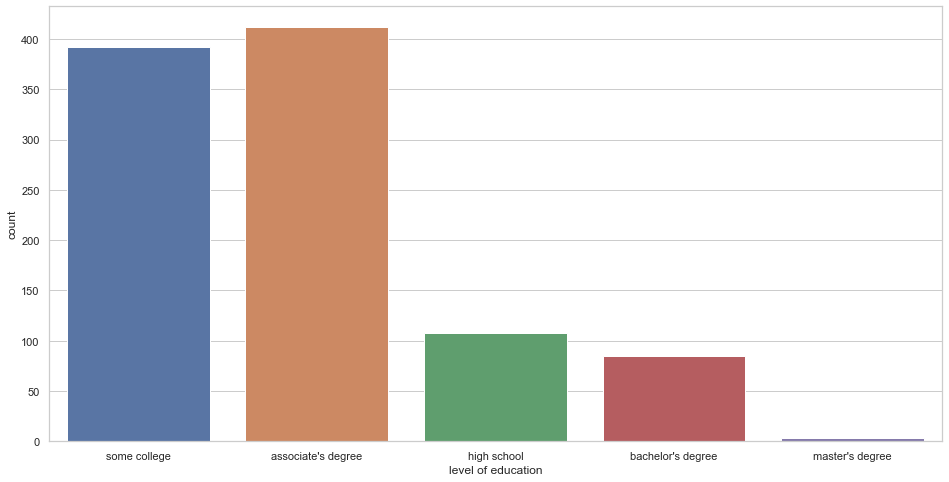

In [26]:
plt.figure(figsize=(16,8))
sns.set(style='whitegrid') # purpose of using grid is to get accurate answer as it makes visualization easy
sns.countplot(data=df, x= 'level of education')

We can also add another catogery using hue 

<AxesSubplot:xlabel='level of education', ylabel='count'>

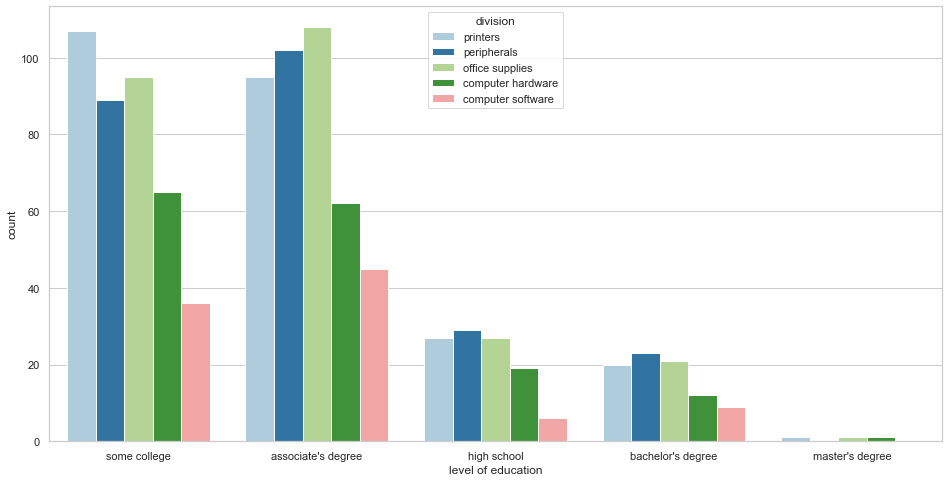

In [27]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='level of education', hue='division', palette='Paired') #palette allows use to choose different color themes 

## Barplot()

We can also add continuous feature on the y-axis and call our required function on using estimator in the bar plot

<AxesSubplot:xlabel='level of education', ylabel='salary'>

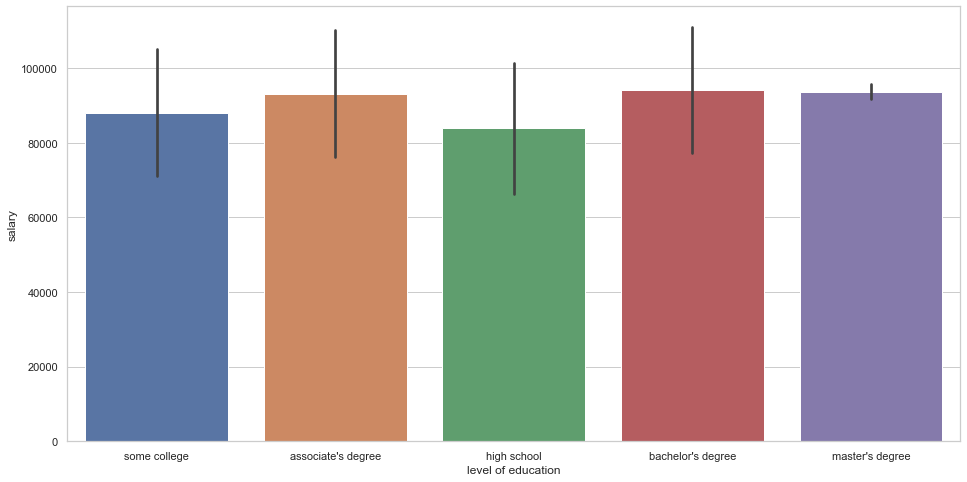

In [28]:
plt.figure(figsize=(16,8))
sns.barplot(x='level of education', y='salary', data=df, estimator=np.mean, ci='sd')

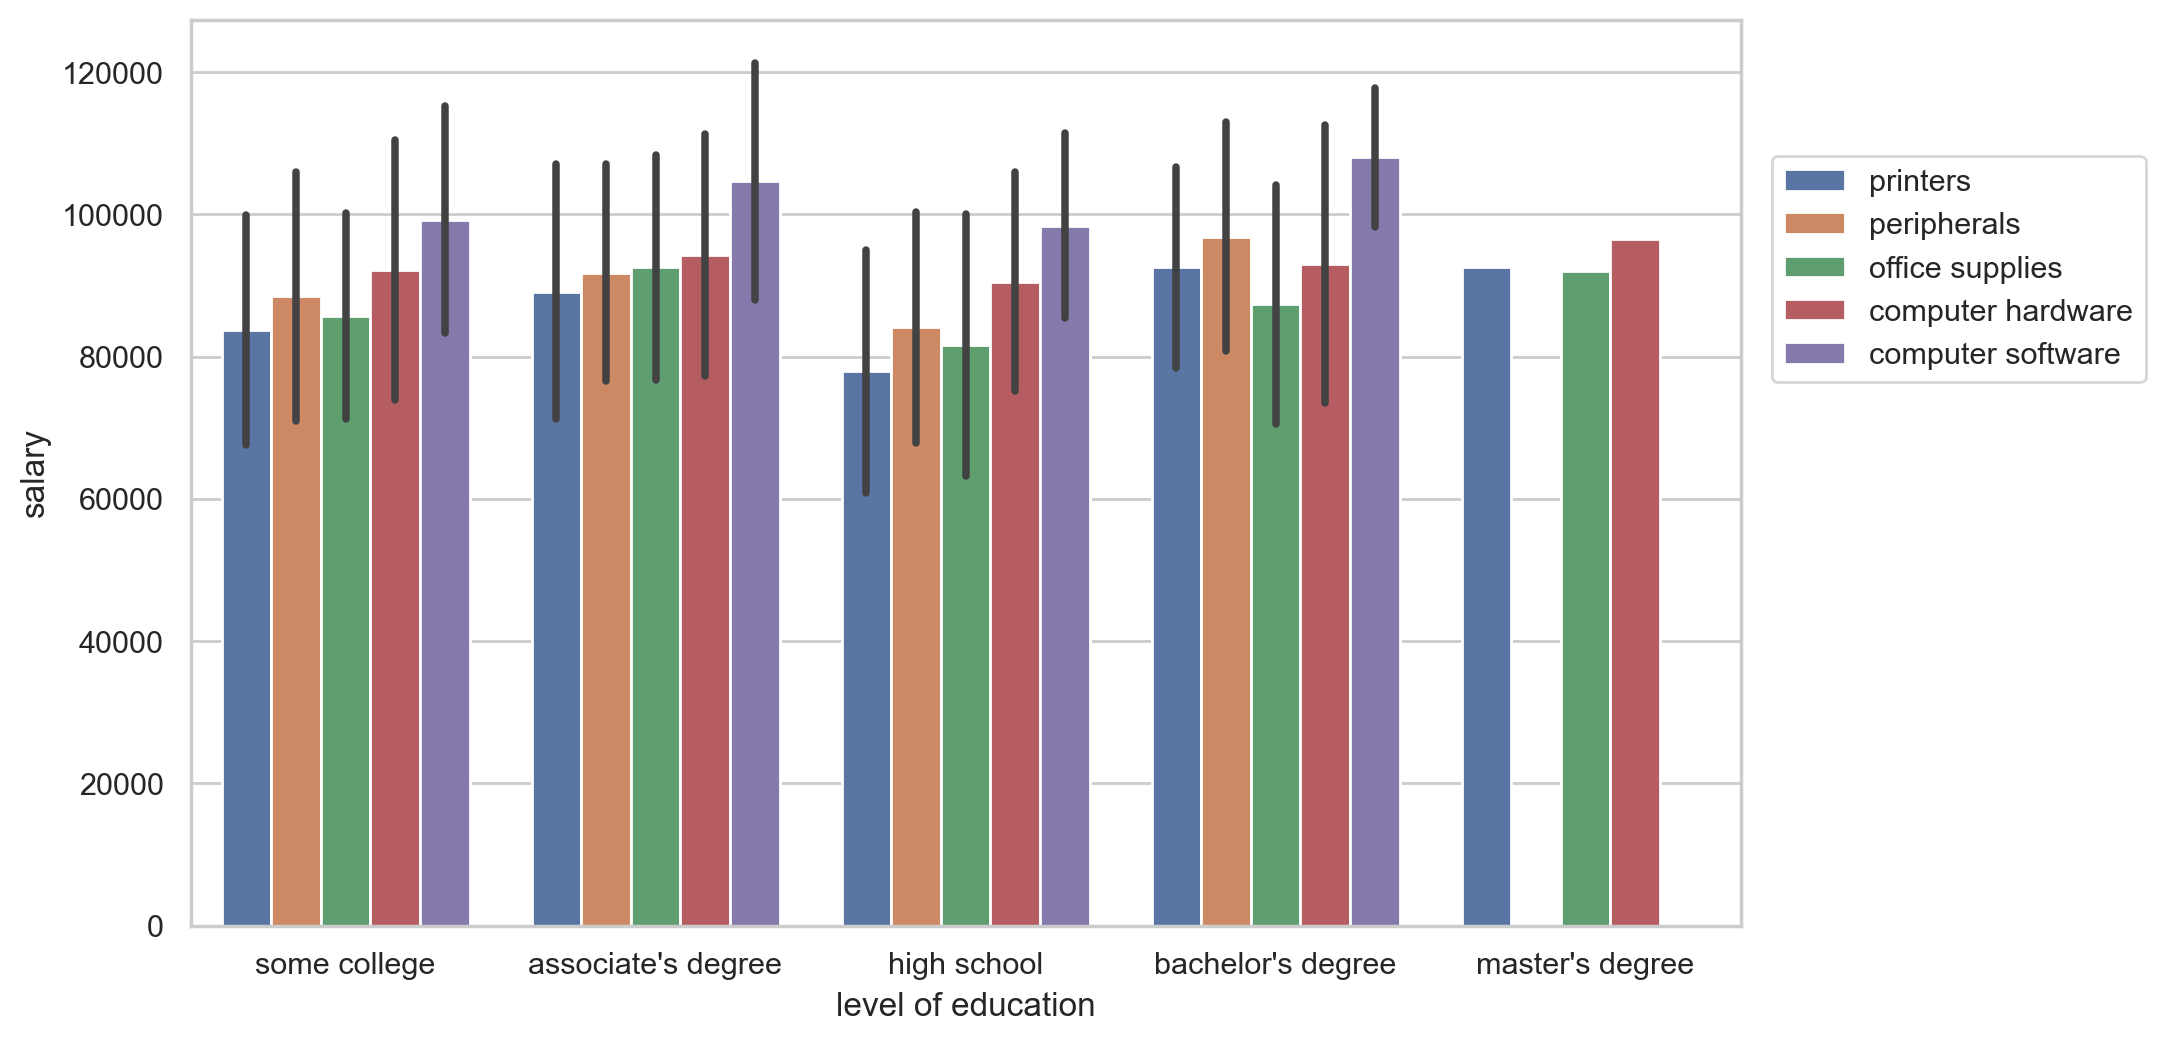

In [29]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(x='level of education', y='salary', data=df, estimator=np.mean, ci='sd', hue ='division')

plt.legend(loc=(1.02,0.6))
plt.savefig('Barplot.png',bbox_inches='tight')

# Categorical Plots - Distribution within Categories

We will explore how to visualize the distribution within categories.

In [30]:
df = pd.read_csv("StudentsPerformance.csv")

In [31]:
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Box Plot

a boxplot display distribution through the use of quartiles and an IQR for outliers. Box itself contains 50% of all the data points and the middle line in the box (Q2) represents median which means 50% data is below that line and 50% data is above that line.Q1 represents lower quartile which means 25 perc data is below that line and 25 % data is above the line and Q3 represent upper quartile and has same characteristic as Q2. 

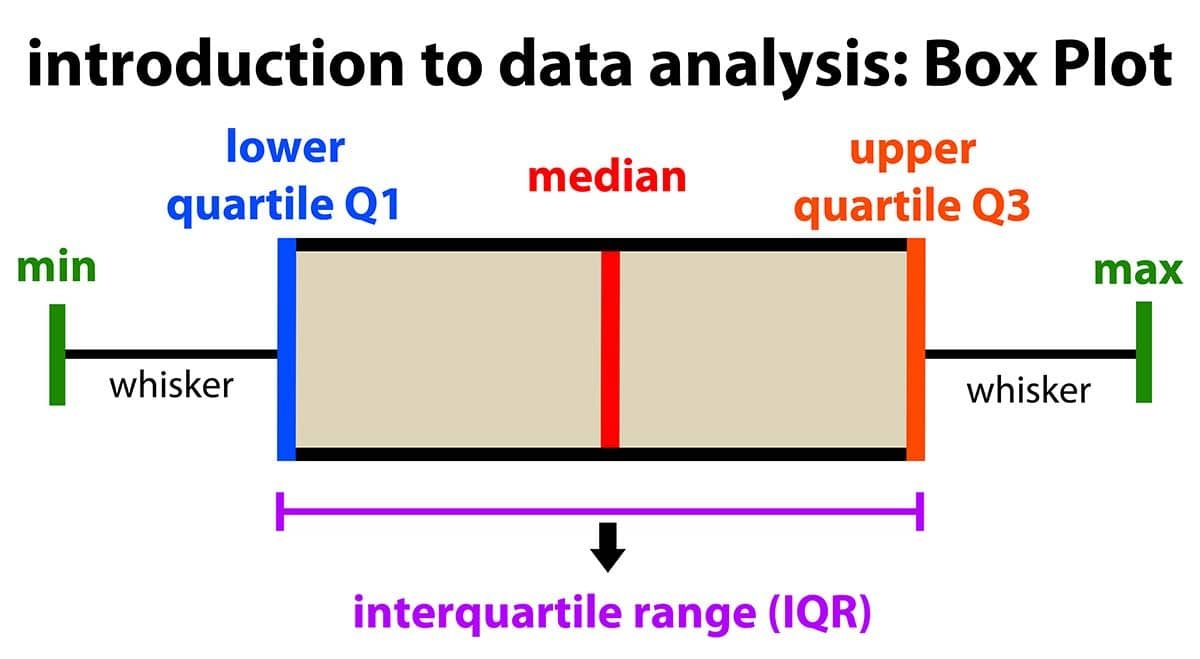

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

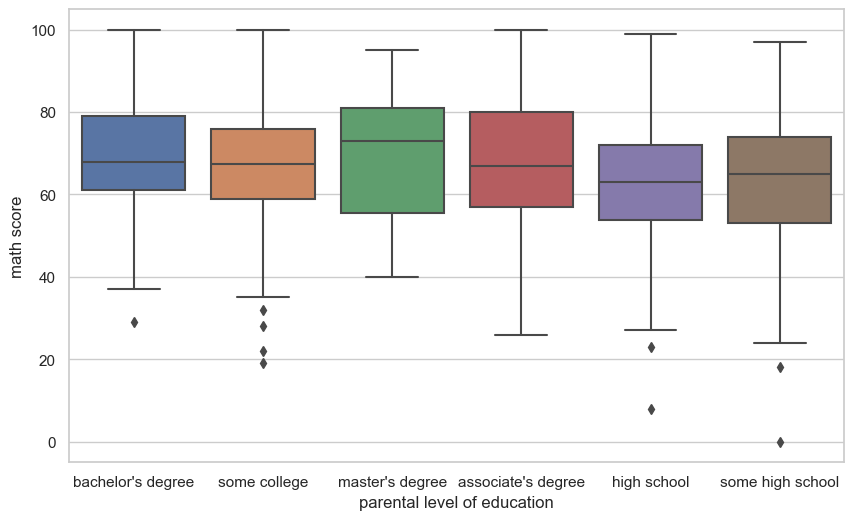

In [33]:
plt.figure(figsize=(10,6),dpi=100)
sns.set(style='whitegrid')
sns.boxplot(x='parental level of education',y='math score',data=df)



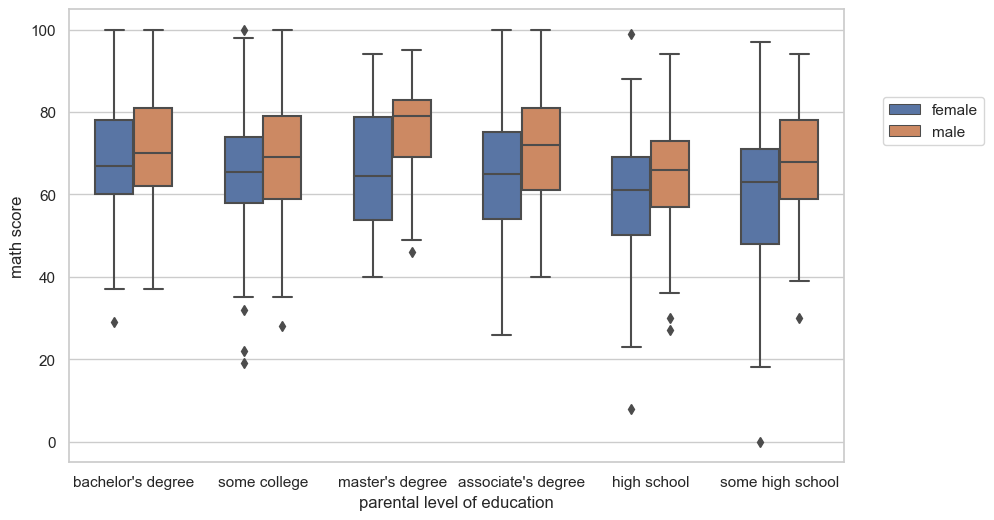

In [34]:
plt.figure(figsize=(10,6),dpi=100)
sns.boxplot(x='parental level of education',y='math score',hue='gender',data=df,orient='v',width=0.6)
plt.legend(loc=(1.05,0.7));

# Comparison Plots

## Joint Plot

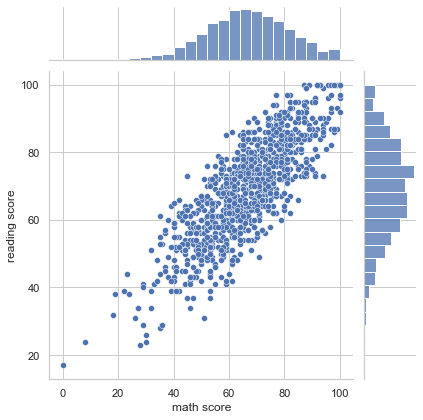

In [35]:
sns.jointplot(x='math score',y='reading score', data=df, )

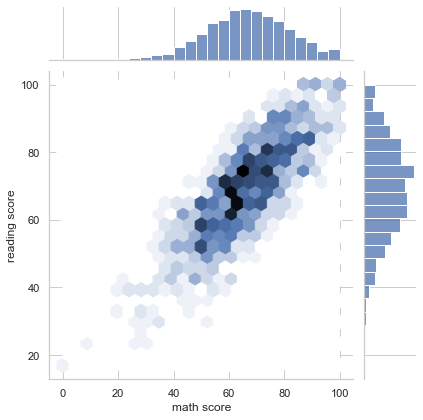

In [36]:
sns.jointplot(x='math score',y='reading score',data=df,kind='hex')

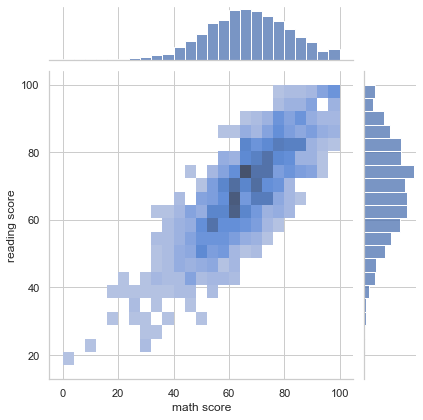

In [37]:
sns.jointplot(x='math score',y='reading score',data=df,kind='hist')

<Figure size 1000x600 with 0 Axes>

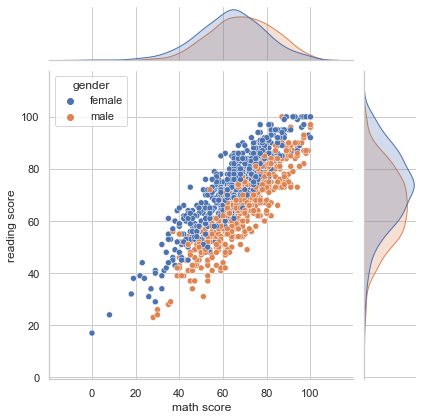

In [38]:
plt.figure(figsize=(10,6),dpi=100)
sns.set(style='whitegrid')

sns.jointplot(x='math score',y='reading score',data=df,kind='scatter', hue='gender')

## Pair Plot

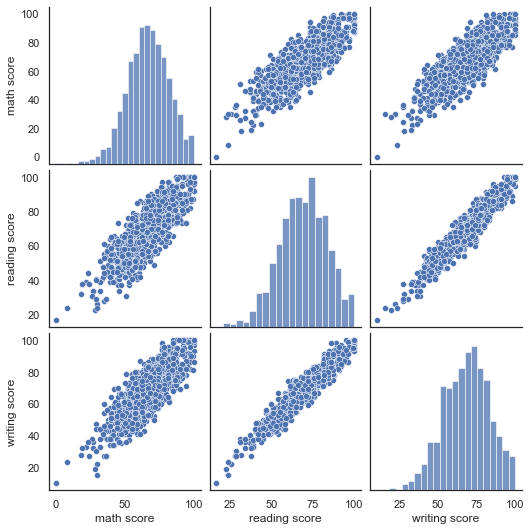

In [39]:
sns.set(style='white')
sns.pairplot(df);

If we want we can remove the duplicate information because upper corner contains the same plots as lower corners so it will not effect our information in anyway 

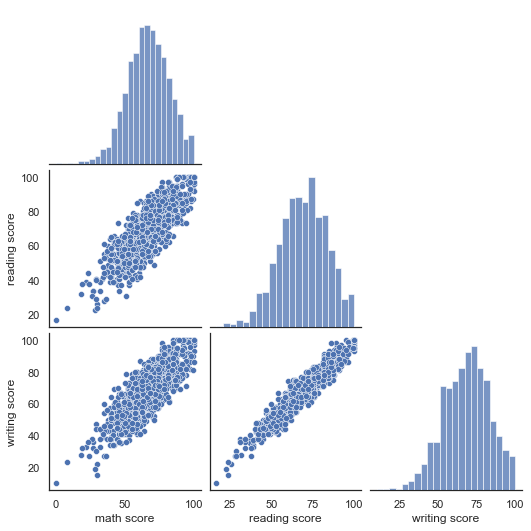

In [40]:
sns.pairplot(data=df,corner=True);


We can also add hue to visualize the category based plot

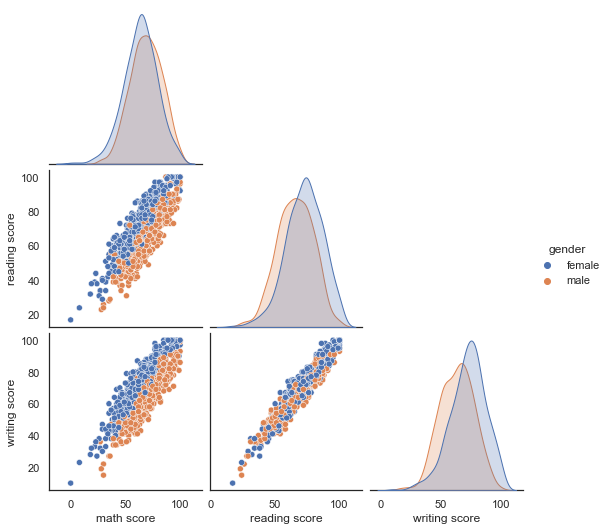

In [41]:
sns.pairplot(data=df,hue='gender',corner=True);

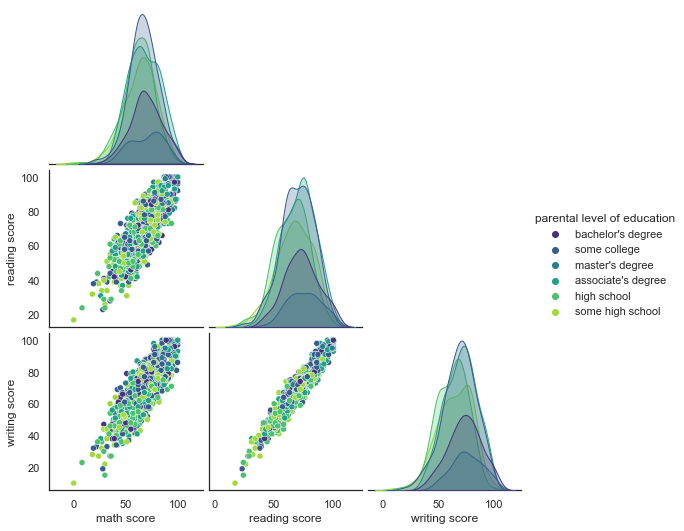

In [42]:
sns.pairplot(data=df,hue='parental level of education',palette='viridis',corner=True);

If we want we can also use histogram on diagnal but its very difficult to get better understanding about overlapping data

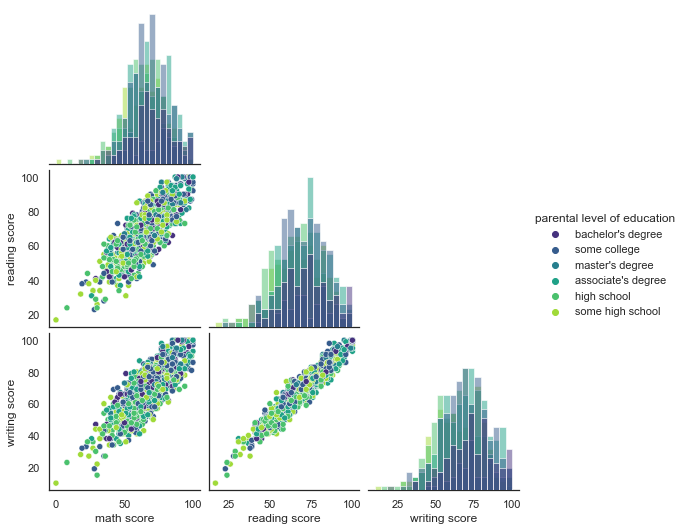

In [43]:
sns.pairplot(data=df,hue='parental level of education',diag_kind='hist',palette='viridis',corner=True);

## Grids in Seaborn

Seaborne grids are like to matplotlib subplots call.And what they do is they automatically create a grid for the subplots based off a categorical column.

## catplot()

catplot takes in additional arguments of row and column and row and column is actually what is going to define the subplot grid that is created below this and then we just have to say what kind of plot we want like (box, voilin, swarm etc).

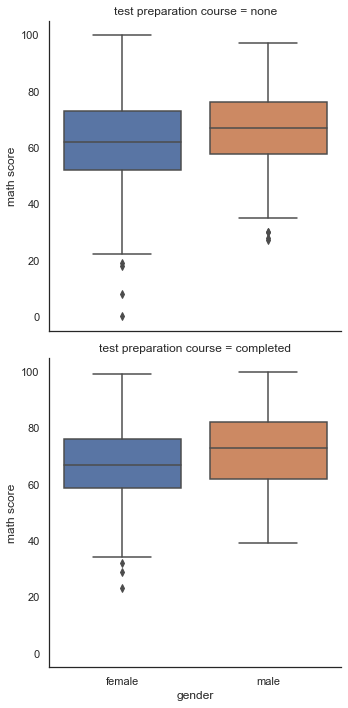

In [44]:
sns.catplot(data=df,x='gender',y='math score',kind='box', row= 'test preparation course' )

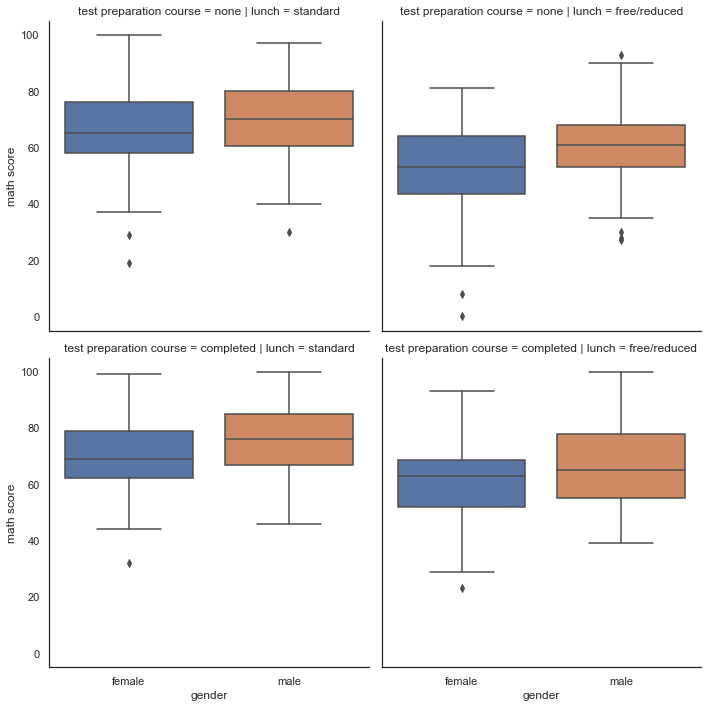

In [45]:
sns.catplot(data=df,x='gender',y='math score',kind='box', col= 'lunch', row= 'test preparation course' )

## Pair Grid()

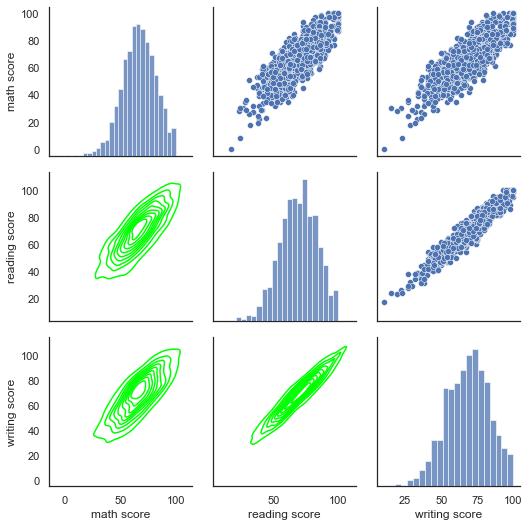

In [46]:
g = sns.PairGrid(df)
g = g.map_upper(sns.scatterplot)
g = g.map_diag(sns.histplot)
g = g.map_lower(sns.kdeplot, colors="lime")

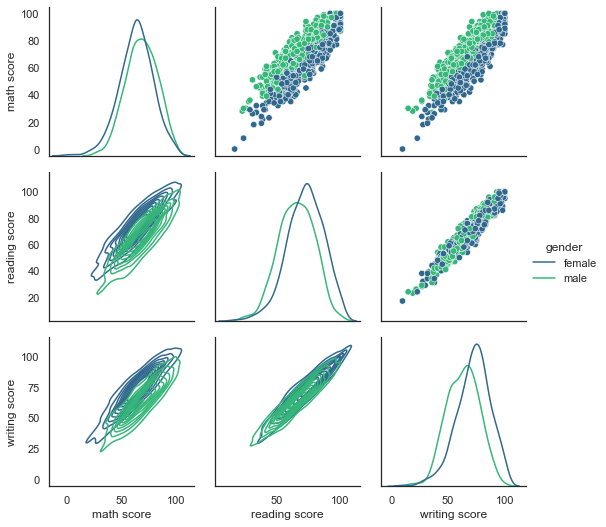

In [47]:

g = sns.PairGrid(df, hue="gender", palette="viridis")
g = g.map_upper(sns.scatterplot, linewidths=1, edgecolor="w", s=40,  markers=['+', 'o']) #markersnot working dont know about this.
g = g.map_diag(sns.kdeplot)
g = g.map_lower(sns.kdeplot)
g = g.add_legend();

# Matrix Plots

In matrix plot we will discuss about heatmap() and cluster map

## Heatmap()

Heat map is basically a representation of data in the form of a map or diagram in which data values are represented as colours.

In [48]:
df = pd.read_csv('country_table.csv')

In [49]:
df

,Countries,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
0,AFRICA,32.577,7.837,63.472,44.215,24.40
1,ASIA,15.796,7.030,73.787,23.185,8.44
2,EUROPE,10.118,11.163,78.740,3.750,0.38
3,LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
4,NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
5,OCEANIA,16.235,6.788,78.880,16.939,12.79
6,WORLD,17.963,7.601,72.766,27.492,10.36


For heatmap its better to have named index rather than number index for better understanding

In [50]:
df = df.set_index('Countries')

In [51]:
df

,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
Countries,,,,,
AFRICA,32.577,7.837,63.472,44.215,24.40
ASIA,15.796,7.030,73.787,23.185,8.44
EUROPE,10.118,11.163,78.740,3.750,0.38
LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
OCEANIA,16.235,6.788,78.880,16.939,12.79
WORLD,17.963,7.601,72.766,27.492,10.36


The most important thing we should consider when plotting a heat map that we should provide it data having same unit. For example here we have a data where 4 columns(Birth, Mortality, Infant Mortality, Growth) have a unit rate while Life expectancy have a unit year.Which is why the color mapping is completely off here and it looks almost like everyone has a similar growth rate. To avoid this issue we drop such columns

<AxesSubplot:ylabel='Countries'>

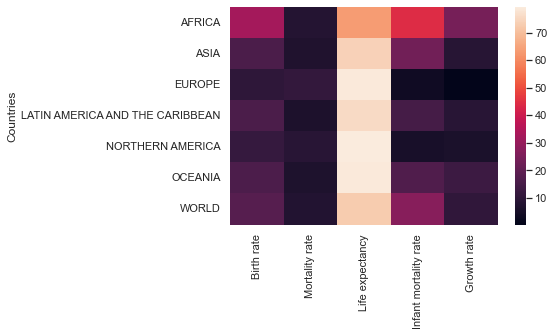

In [52]:
#without dropping column
sns.heatmap(df)

In [53]:
rates = df.drop('Life expectancy',axis=1)

<AxesSubplot:ylabel='Countries'>

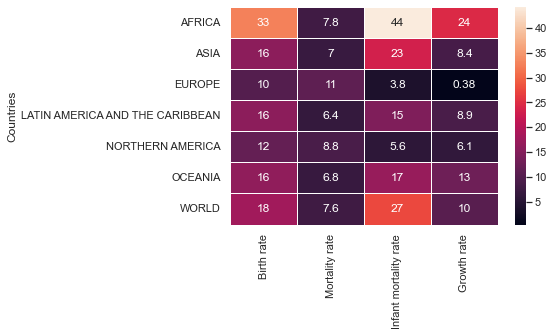

In [54]:
# dropping column
sns.heatmap(rates,lw=0.5,annot=True)

<AxesSubplot:ylabel='Countries'>

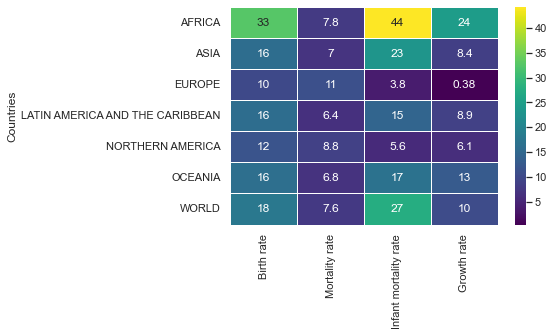

In [55]:
# We can also have different color mappings
sns.heatmap(rates,linewidth=0.5,annot=True,cmap='viridis')

## Clustermap


Plot a dataset as a hierarchically-clustered heatmap.

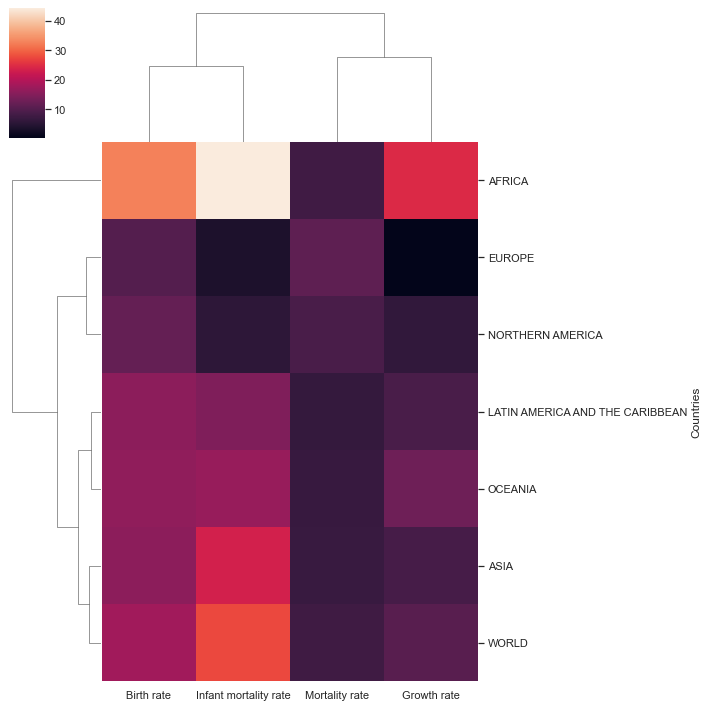

In [56]:
sns.clustermap(rates)

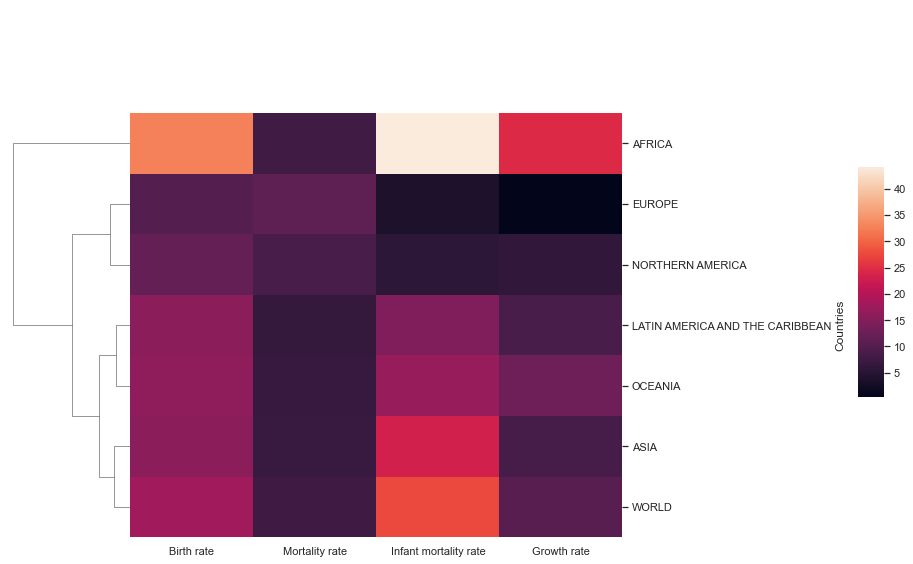

In [57]:
sns.clustermap(rates,col_cluster=False,cbar_pos=(1,0.3,.03,.4),figsize=(12,8))

In [58]:
'Official Documentation of Seaborn'
print('https://seaborn.pydata.org/')

https://seaborn.pydata.org/


# Never Stop Learning  Never stop growing

In [62]:
e=df.copy()

In [68]:
e

,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
Countries,,,,,
AFRICA,32.577,7.837,63.472,44.215,24.40
ASIA,15.796,7.030,73.787,23.185,8.44
EUROPE,10.118,11.163,78.740,3.750,0.38
LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
OCEANIA,16.235,6.788,78.880,16.939,12.79
WORLD,17.963,7.601,72.766,27.492,10.36


In [83]:
f=e['Birth rate']

In [84]:
f=-1*f

In [88]:
g=f[f<0]

In [89]:
g

Countries
AFRICA                            -32.577
ASIA                              -15.796
EUROPE                            -10.118
LATIN AMERICA AND THE CARIBBEAN   -15.886
NORTHERN AMERICA                  -11.780
OCEANIA                           -16.235
WORLD                             -17.963
Name: Birth rate, dtype: float64